In [1]:
import pandas as pd
import tushare as ts

In [2]:
import summary3 as s

In [3]:
s.read_files(r"E:\RH\excel\500F.xlsx")

正在转换数据类型 价格
正在转换数据类型 Shares/Ctrts/Units - Profit/Loss
正在转换数据类型 Net Profit - Cum Net Profit
正在转换数据类型 Run-up/Drawdown


In [4]:
s.start()

正在初始化...
初始化完成!
Signal name          Profit(￥)		Volume	P/V
[ B-AM1 ]            185000.0 		 114.0 	 1622.807
[ C-20 Buy#1 ]       -11780.0 		 2.0 	 -5890.0
[ C-20 Buy#2 ]       24420.0 		 5.0 	 4884.0
[ C-20 Short#2 ]     28640.0 		 25.0 	 1145.6
[ C-20 short#1 ]     52500.0 		 15.0 	 3500.0
[ ST-AM1 ]           288000.0 		 88.0 	 3272.727
Finished Successfully in 1.739 seconds.


In [5]:
t=s.t

In [6]:
class deal():
    def __init__(self, index, dealtype, start, end, start_signal, end_signal, volume, start_price, end_price):
        '''
        多头dealtype = 1， 空头dealtype = 0
        '''
        self.index = index
        if dealtype=='买入':self.type = 1
        else: self.type=-1
        self.start, self.end = start, end
        self.start_signal = start_signal
        self.end_signal = end_signal
        self.volume = volume
        self.start_price, self.end_price = start_price, end_price
        self.profit = (end_price-start_price) * volume * self.type
        self.floating = 0
        self.duration = self.start.day - self.end.day
        self.confirmed = False
    def is_valid(self, today):
        return (today>=self.start) & (today<self.end)
    def confirm_profit(self):
        self.confirmed = True
    def cal_floating(self, close):
        self.floating = (close - self.start_price) * self.volume * self.type
        return self.floating

In [7]:
deal_list=[]
for i in range(1, len(t)):
    #添加交易记录deal对象
    if i%2==1:
        this_row = t.loc[i]
        next_row = t.loc[i+1]
        deal_list.append(
            deal(index=this_row['#'], dealtype = this_row['类型'],
                start=this_row['Date/Time'], end= next_row['Date/Time'],
                start_price=this_row['价格'], end_price=next_row['价格'],
                start_signal=this_row['Signal'], end_signal=next_row['Signal'],
                volume=this_row['Shares/Ctrts/Units - Profit/Loss']))
    print('添加交易记录对象...')

添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易记录对象...
添加交易

In [8]:
deal_list[4].profit

-45.80000000000018

In [9]:
close = pd.read_excel(r"C:\Users\70242\Downloads\Chrome Download\IDX_Idxtrd.xlsx", dtype={'date':'datetime64[ns]'}).set_index('date')

In [10]:
close.index=close.index+pd.Timedelta(15,unit='h')

In [11]:
close.index[0]

Timestamp('2017-03-21 15:00:00')

In [12]:
record=[]
截止当日的累计盈利=0
comfirmed_profit=0
for day in close.index:
    float_profit=0
    for deal in deal_list:
        if deal.is_valid(day):
            float_profit += deal.cal_floating(close.loc[day]['close'])
            deal.floating_profit=deal.cal_floating(close.loc[day]['close'])
        elif day.date()==deal.end.date():
            #如果是当天结束的，当天确认收益
            deal.confirm_profit()
            comfirmed_profit+=deal.profit
            #deal_list.remove(deal)
    截止当日的累计盈利 = comfirmed_profit + float_profit
    print(day, int(float_profit), int(comfirmed_profit), int(截止当日的累计盈利),sep='\t')
    record.append((day, (float_profit), (comfirmed_profit), (截止当日的累计盈利)))

2017-03-21 15:00:00	0	0	0
2017-03-22 15:00:00	0	0	0
2017-03-23 15:00:00	0	0	0
2017-03-24 15:00:00	0	0	0
2017-03-27 15:00:00	0	0	0
2017-03-28 15:00:00	-19	0	-19
2017-03-29 15:00:00	-1	0	-1
2017-03-30 15:00:00	-6	85	78
2017-03-31 15:00:00	-32	85	52
2017-04-05 15:00:00	0	194	194
2017-04-06 15:00:00	0	194	194
2017-04-07 15:00:00	0	194	194
2017-04-10 15:00:00	0	194	194
2017-04-11 15:00:00	16	163	179
2017-04-12 15:00:00	0	117	117
2017-04-13 15:00:00	0	117	117
2017-04-14 15:00:00	20	103	124
2017-04-17 15:00:00	-24	211	187
2017-04-18 15:00:00	14	211	225
2017-04-19 15:00:00	0	300	300
2017-04-20 15:00:00	37	300	337
2017-04-21 15:00:00	28	361	390
2017-04-24 15:00:00	1	679	681
2017-04-25 15:00:00	-28	671	643
2017-04-26 15:00:00	-44	671	627
2017-04-27 15:00:00	49	690	739
2017-04-28 15:00:00	0	688	688
2017-05-02 15:00:00	0	688	688
2017-05-03 15:00:00	-30	688	657
2017-05-04 15:00:00	-24	658	634
2017-05-05 15:00:00	29	691	720
2017-05-08 15:00:00	19	813	833
2017-05-09 15:00:00	0	839	839
2017-05-10 15:0

In [13]:
ans=pd.DataFrame(record,columns=('date','floating_profit','comfirmed_profit','accumlated_profit')).set_index('date')

In [14]:
ans['当日盈亏']=ans.accumlated_profit.diff()

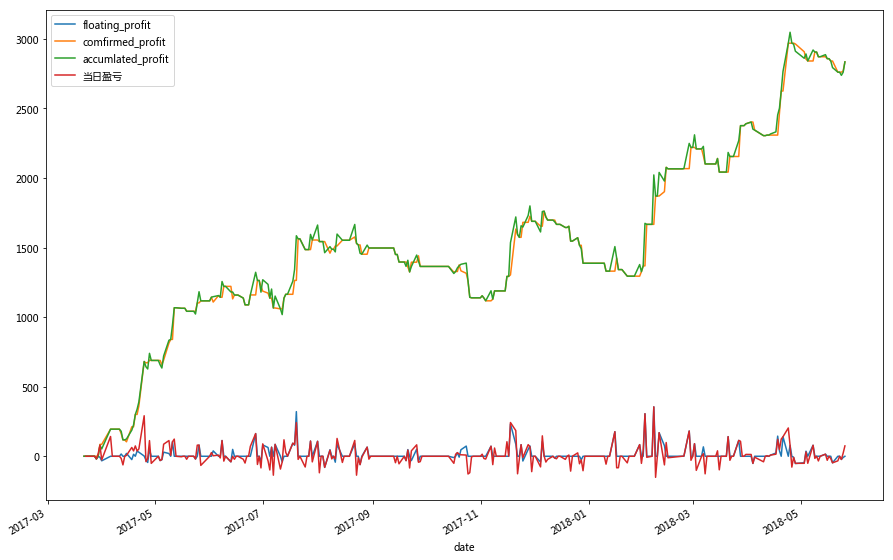

In [15]:
%matplotlib inline
ans.plot(figsize=(15,10)).get_figure().savefig(r'E:\figure.png')

In [16]:
pd.read_excel(r"E:\RH\excel\500F.xlsx", sheet_name=-1,header=2).columns[1]

'IC00.ZJ'

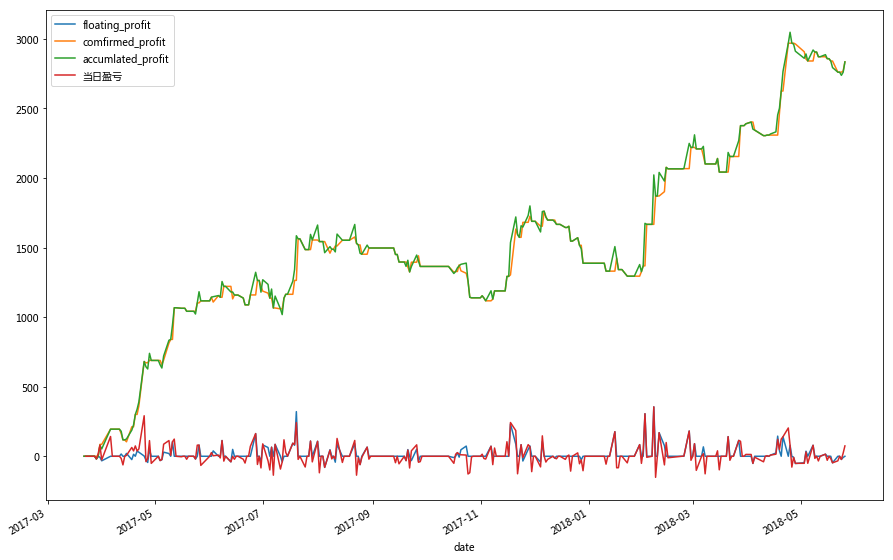

In [17]:
graph=ans.plot(figsize=(15,10)).get_figure()

## 放到excel中

In [21]:
import openpyxl
from openpyxl.drawing.image import Image

In [53]:
result = openpyxl.load_workbook(r"E:\RH\excel\500. [OUTPUT].xlsx")
daysheet = result.create_sheet(title='日收益详情')

In [54]:
graph=Image(r'E:\figure.png')

In [55]:
daysheet.append([' ',' ',' ',' ',' ',' '])
daysheet.add_image(graph, 'F1')

In [58]:
result.save(r"E:\RH\excel\500[OUTPUT].xlsx")

In [56]:
daysheet.append(['date','floating_profit','comfirmed_profit','accumlated_profit','当日盈亏'])

In [57]:
for row in ans.index:
    daysheet.append([row]+list(ans.loc[row]))

In [49]:
ans.loc[row]

floating_profit         0.00
comfirmed_profit     2833.90
accumlated_profit    2833.90
当日盈亏                   74.42
Name: 2018-05-25 15:00:00, dtype: float64

## Rewrite previous programs
__useing Deal object__

In [18]:
help(deal_list[1])

Help on deal in module __main__ object:

class deal(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, index, dealtype, start, end, start_signal, end_signal, volume, start_price, end_price)
 |      多头dealtype = 1， 空头dealtype = 0
 |  
 |  cal_floating(self, close)
 |  
 |  confirm_profit(self)
 |  
 |  is_valid(self, today)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [19]:
dl=deal_list

In [22]:
dl[1].start_signal

'C-20 Short#2'

In [15]:
import matplotlib
import matplotlib.pyplot as plt

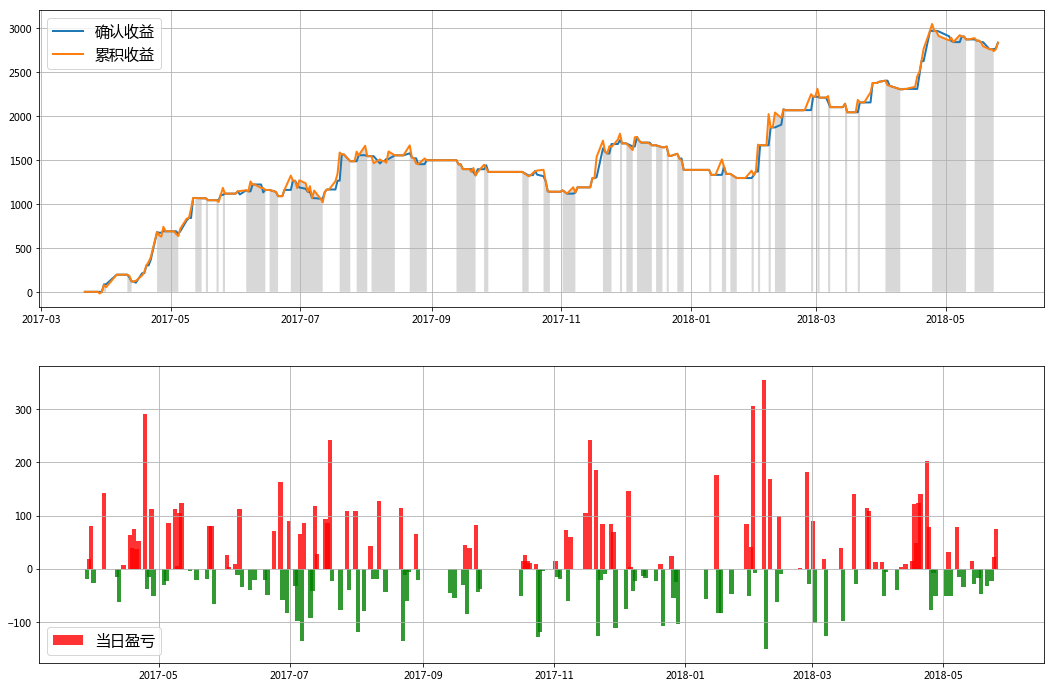

In [16]:
fig = plt.figure()
fig.set_size_inches(18, 12)

ax = fig.add_subplot(211) 
ax.plot(ans.index,ans['comfirmed_profit'], linewidth=2, label='确认收益')
ax.plot(ans.index,ans['accumlated_profit'], linewidth=2, label='累积收益')
ax.fill_between(ans.index,ans.accumlated_profit, y2=0, 
                where=(ans.accumlated_profit<ans.accumlated_profit.shift(1))| \
                        ((ans.accumlated_profit>ans.accumlated_profit.shift(-1))&(ans.accumlated_profit>=ans.accumlated_profit.shift(1))),
                facecolor='grey',
                alpha=0.3) 
#最大回撤标注
'''ax.fill_between(ans.index,ans.accumlated_profit, y2=0, 
                where=(ans.index>=temp[1])&(ans.index<=temp[2]),
                facecolor='green',
                alpha=0.3) '''
ax.legend(fontsize=15)
plt.grid()  

bx = fig.add_subplot(212) 
bx.bar(ans.index, ans.当日盈亏.where(ans.当日盈亏>0), 2, label='当日盈亏', color='red',alpha=0.8)
bx.bar(ans.index, ans.当日盈亏.where(ans.当日盈亏<0), 2, label='当日盈亏', color='green',alpha=0.8)
bx.legend(fontsize=15)
plt.grid()  


In [21]:
d=ans.index[1]

In [34]:
d.year

2017